# Summer 2022 Data Science Intern Challenge 

## Detailed Solution to Question 1

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load dataset:
fname = r"./2019 Winter Data Science Intern Challenge Data Set.xlsx"
orders = pd.read_excel(fname)

### Short answer

A statistical summary of the order_amount and total_items columns indicates the cause of the high AOV. There are likely a small number of very large order amounts skewing the mean (comparing max values to the third quartile values): 

In [15]:
# Statistical summary of data:
summary = orders.describe()[['order_amount', 'total_items']]
print(summary)

        order_amount  total_items
count    5000.000000   5000.00000
mean     3145.128000      8.78720
std     41282.539349    116.32032
min        90.000000      1.00000
25%       163.000000      1.00000
50%       284.000000      2.00000
75%       390.000000      3.00000
max    704000.000000   2000.00000
3145.128


In fact, only 1.4% of orders have order amounts greater than the AOV (below), confirming that there is only a small number of very large order amounts:

In [19]:
# Compute percentage of order amounts greater than AOV:
aov = summary.loc['mean', 'order_amount']
n_gtaov = len(orders.loc[orders['order_amount'] > aov])
print("Number of order amounts greater than AOV: %i" % n_gtaov)
print("Percentage of order amounts greater than AOV: %0.1f%%" % (100*n_gt1000/len(orders)))

Number of order amounts greater than AOV: 63
Percentage of order amounts greater than AOV: 1.4%


In this case, the median order value (MOV) of $284 is a better representation of a typical sneaker purchase, since it is not affected by a few outliers. Also, comparison with the first and third quartiles shows a fairly tight clustering of at least the inner 50% of the distribution about the median value, again supporting the MOV as a good indicator of a typical purchase. If asked for a quick and easy metric to evaluate this data, I would recommend the median. 

### Longer answer

Pushing the analysis just a little further suggests that there are three groups of purchase-types which make up this dataset, each with their own typical purchase values. Plotting the cost per sneaker vs. units sold for each order shows these three groups:

Text(0, 0.5, 'cost per sneaker')

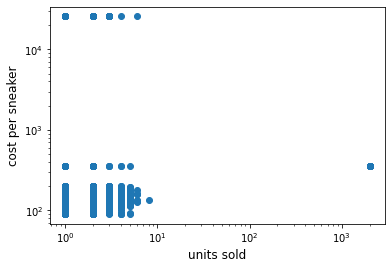

In [20]:
orders['amount_per_unit'] = orders['order_amount']/orders['total_items'] # Cost per sneaker for each order.

plt.figure()
plt.scatter(orders['total_items'], orders['amount_per_unit'])
plt.loglog(base=10)
plt.xlabel('units sold', fontsize=12)
plt.ylabel('cost per sneaker', fontsize=12)

The three groups are:

1) Lower number of units sold, lower cost per sneaker. This makes up the large majority of orders and has the same MOV, \\$284, as the analysis above: 

In [24]:
lowunits_lowcost = orders.loc[(orders['total_items']<10) & (orders['amount_per_unit']<1000)]
lowunits_lowcost.describe()[['order_amount', 'total_items']]

,order_amount,total_items
count,4937.000000,4937.000000
mean,302.580514,1.994734
std,160.804912,0.982821
min,90.000000,1.000000
25%,163.000000,1.000000
50%,284.000000,2.000000
75%,387.000000,3.000000
max,1760.000000,8.000000


2) Lower number of units sold, higher cost per sneaker. The AOV and MOV for this group are both around \\$50,000. This could be e.g. rare addition sneakers purchased by people with high disposable income (assuming \\$25,000 for a single sneaker isn't a data error!).

In [25]:
lowunits_highcost = orders.loc[(orders['total_items']<10) & (orders['amount_per_unit']>1000)]
lowunits_highcost.describe()[['order_amount', 'total_items']]

,order_amount,total_items
count,46.000000,46.000000
mean,49213.043478,1.913043
std,26472.227449,1.029047
min,25725.000000,1.000000
25%,25725.000000,1.000000
50%,51450.000000,2.000000
75%,51450.000000,2.000000
max,154350.000000,6.000000


3) Higher number of units sold, lower cost per sneaker, maybe associated with a retailer buying wholesale from the sneaker company. The AOV and MOV are both \\$704,000.

In [26]:
highunits_lowcost = orders.loc[(orders['total_items']>10) & (orders['amount_per_unit']<1000)]
highunits_lowcost.describe()[['order_amount', 'total_items']]

,order_amount,total_items
count,17.0,17.0
mean,704000.0,2000.0
std,0.0,0.0
min,704000.0,2000.0
25%,704000.0,2000.0
50%,704000.0,2000.0
75%,704000.0,2000.0
max,704000.0,2000.0


As a final remark, each of the groups has an AOV close to its respective MOV.

### Summary

A quick analysis of this dataset shows that the MOV, \\$284, is a much better representation of the typical order than the AOV.

A slightly more in-depth analysis shows that the dataset can be split into three groups, each with a distinct MOV:
1) Lower number of units sold, lower cost per sneaker: MOV = \\$284.

2) Lower number of units sold, higher cost per sneaker: MOV = \\$51,450.

3) Higher number of units sold, lower cost per sneaker: MOV = \\$704,000.

Further, when the data are grouped in this way, the AOV and MOV agree well for each group.